In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory



# Table of contents

Demonstrating CNN use with The ASL MNIST Dataset and a simple neural network

Improvement paths from starting model

Optimizing hyperparameters via grid search (useful for smaller CNN's)

(pending)[Using transfer learning from Keras applications](#tlearning)

(pending as well) Implementing the second data set: grassnoted archive

based on instructions [here](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook)

## Demonstrating CNN use with The ASL MNIST Dataset and a simple neural network

In [2]:
train_data = pd.read_csv('data/sign_mnist_train.csv')

test_data = pd.read_csv('data/sign_mnist_test.csv')


In [3]:
train_data.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [4]:
y_train = train_data.iloc[:,0]
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [5]:
train_label_freq = y_train.groupby(y_train).count()
train_label_freq.head()

label
0    1126
1    1010
2    1144
3    1196
4     957
Name: label, dtype: int64

<AxesSubplot:xlabel='label'>

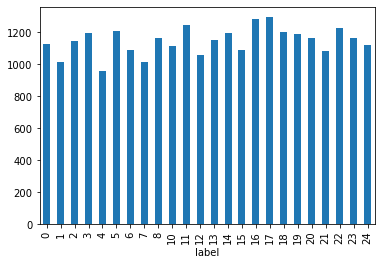

In [6]:


train_label_freq.plot.bar()

dataset appears balanced enough for training

In [7]:
X_train = train_data.iloc[:,1:]
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [8]:
y_test = test_data.iloc[:,0]
X_test = test_data.iloc[:,1:]

    From the class notebook section BUILDING A CNN USING TENSORFLOW     

In [8]:
# Specific neural network models & layer types
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

NameError: name 'X_train' is not defined

In [4]:
# range of x values
print(f'X range: {X_train.min()[0]}-{X_train.max()[0]}') #just for show
# y unique values
print(f'y values: {np.unique(y_train)}')
num_classes = len(np.unique(y_train))
print(f'Number of classes: {num_classes}') #no 9's present

NameError: name 'X_train' is not defined

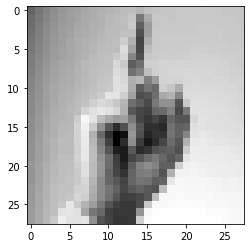

In [12]:
# plt.pyplot.imshow(X_train.iloc[0,:]) 
# error generated: Invalid shape (784,) for image data
#sqrt(784) = 28
sample_image = X_train.iloc[0,:].values.reshape(28,28)
plt.pyplot.imshow(sample_image, cmap = 'gray')

creating an __X_train__ array of 28x28 images

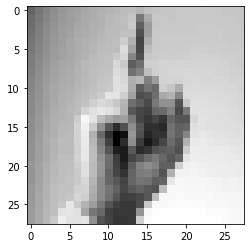

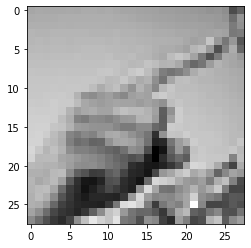

(27455, 28, 28)

In [13]:
X_images_train = []
for n in range(X_train.shape[0]):
    nth_image = X_train.iloc[n,:].values.reshape(28,28)
    X_images_train.append(nth_image)

#showing results
plt.pyplot.imshow(X_images_train[0], cmap = 'gray')
plt.pyplot.show()
plt.pyplot.imshow(X_images_train[1], cmap = 'gray')
plt.pyplot.show()
np.array(X_images_train).shape

Creating a matching __X_test__ array of 28x28 images

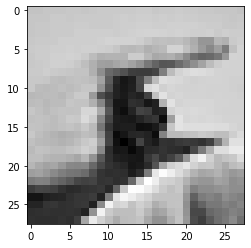

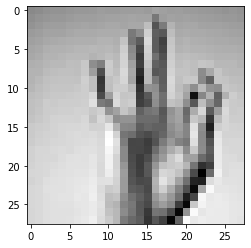

(27455, 28, 28)

In [14]:
X_images_test = []
for n in range(X_test.shape[0]):
    nth_image = X_test.iloc[n,:].values.reshape(28,28)
    X_images_test.append(nth_image)


plt.pyplot.imshow(X_images_test[0], cmap = 'gray')
plt.pyplot.show()
plt.pyplot.imshow(X_images_test[1], cmap = 'gray')
plt.pyplot.show()
np.array(X_images_train).shape

In [15]:
# Define input image dimensions
img_rows, img_cols = 28, 28
# Reshape for Keras model types
X_train = X_train.values.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.values.reshape(X_test.shape[0], img_rows, img_cols, 1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (27455, 28, 28, 1)
X_test shape: (7172, 28, 28, 1)


Scaling pixel values from 0-255 to 0-1 linearly (min-max scaling)

In [16]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(f'X_train range: {X_train.min()}-{X_train.max()}')

X_train range: 0.0-1.0


Replicating X_train and X_test for later use in cross validation

In [17]:
X_train_copy = X_train
X_test_copy = X_test

Constructing the CNN model

In [20]:
CNN_model_0 = Sequential()





CNN_model_0.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (28, 28, 1)))

CNN_model_0.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model_0.add(MaxPooling2D(pool_size=(2, 2))) #avg pooling may also be used

CNN_model_0.add(Dropout(0.25)) #dropout may be varied here



CNN_model_0.add(Flatten())


CNN_model_0.add(Dense(128, activation='relu'))
CNN_model_0.add(Dropout(0.5))

# num_classes was here, but as the labels are missing an int before 24,
# num_classes is too small
# if this results in it guessing a nonexistant class or something
# here may be why
CNN_model_0.add(Dense(num_classes+1, activation='softmax'))

# Print out a summary of the network
CNN_model_0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

Compiling

In [22]:
CNN_model_0.compile(loss = 'sparse_categorical_crossentropy', #loss function
                  optimizer = 'Adam',
                  metrics = ['accuracy']) #value to maximize

Training

In [20]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train,
                                                    test_size = .32, random_state = 1)

In [21]:
# Fit the model on the training data, defining desired batch_size & number of epochs,
# running validation on the test data after each batch
# THIS WILL TAKE A LONG TIME TO RUN!!!
CNN_model_0.fit(X_train, y_train,
              batch_size = 128,
              epochs = 5,
              verbose = 1,
              validation_data = (X_vali, y_vali))

Epoch 1/5
146/146 [==============================] - 22s 150ms/step - loss: 1.8805 - accuracy: 0.4498 - val_loss: 0.4476 - val_accuracy: 0.9181
Epoch 2/5
146/146 [==============================] - 21s 142ms/step - loss: 0.4916 - accuracy: 0.8407 - val_loss: 0.0847 - val_accuracy: 0.9890
Epoch 3/5
146/146 [==============================] - 20s 140ms/step - loss: 0.2203 - accuracy: 0.9317 - val_loss: 0.0254 - val_accuracy: 0.9987
Epoch 4/5
146/146 [==============================] - 20s 140ms/step - loss: 0.1332 - accuracy: 0.9591 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 5/5
146/146 [==============================] - 20s 140ms/step - loss: 0.0998 - accuracy: 0.9700 - val_loss: 0.0044 - val_accuracy: 1.0000


evaluating via test data

In [22]:
score = CNN_model_0.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 2s 10ms/step - loss: 0.5013 - accuracy: 0.8801
Test loss: 0.5012662410736084
Test accuracy: 0.8800892233848572


Time required for a single image

In [23]:
X_test.shape

(7172, 28, 28, 1)

In [24]:
X_test_one_pic = X_test[0,:,:,:]
y_test_one_pic = y_test[0]

In [25]:
y_test_one_pic

6

In [26]:
X_test_one_pic = X_test_one_pic.reshape(1,
                                        X_test_one_pic.shape[0],
                                        X_test_one_pic.shape[1],
                                        X_test_one_pic.shape[2])

y_test_one_pic = y_test_one_pic.reshape(1)

In [27]:
X_test_one_pic.shape

(1, 28, 28, 1)

In [28]:
type(X_test_one_pic)

numpy.ndarray

In [29]:
y_test_one_pic.shape

(1,)

In [30]:
type(y_test_one_pic)

numpy.ndarray

In [31]:
y_test_one_pic = np.array(y_test_one_pic)

In [32]:
#finding the time for a single image recognition
score = CNN_model.predict(X_test_one_pic, verbose=1)

1/1 [==============================] - 0s 2ms/step


<AxesSubplot:>

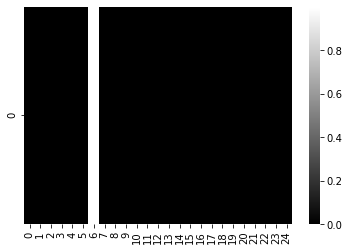

In [33]:
sns.heatmap(score, cmap = 'gray')

## Improvement paths from starting model

Improvement paths:
To improve **accuracy**, try optimizing for epochs and other hyperparameters via [grid search](https://mlfromscratch.com/gridsearch-keras-sklearn/#/). 

To improve **time**, try other short NN's.

To improve **accuracy for video response**, try using the grassnoted dataset as it is more diverse in RGB and in skin tone.

## Optimizing hyperparameters via grid search (useful for smaller CNN's)
Code from the guide [here](https://mlfromscratch.com/gridsearch-keras-sklearn/#/) by Casper Hansen.

In [34]:
#presenting X_train_copy and X_test_copy
X_train_copy
X_test_copy


array([[[[0.58431375],
         [0.58431375],
         [0.5882353 ],
         ...,
         [0.5882353 ],
         [0.5882353 ],
         [0.58431375]],

        [[0.5882353 ],
         [0.5882353 ],
         [0.5882353 ],
         ...,
         [0.5921569 ],
         [0.5882353 ],
         [0.5921569 ]],

        [[0.5882353 ],
         [0.5921569 ],
         [0.5921569 ],
         ...,
         [0.5921569 ],
         [0.5921569 ],
         [0.59607846]],

        ...,

        [[0.27058825],
         [0.27058825],
         [0.3019608 ],
         ...,
         [0.45490196],
         [0.44313726],
         [0.4627451 ]],

        [[0.2901961 ],
         [0.29411766],
         [0.29803923],
         ...,
         [0.43137255],
         [0.45490196],
         [0.44313726]],

        [[0.29411766],
         [0.2901961 ],
         [0.2901961 ],
         ...,
         [0.4392157 ],
         [0.47058824],
         [0.41960785]]],


       [[[0.49411765],
         [0.5019608 ],
         [0.51

**! vv The code in this section is not by me. vv !**

In [9]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Setting the input shape that the model should expect for each photo.

In [36]:
input_shape = (28, 28, 1)

Preparing a function to create CNN models. As GridSearchCV comes from Sci-kit Learn, rather than Keras, the ways in which GridSearchCV adjusts parameters (using in-built methods) do not work. The model thus needs to be rebuilt with different parameters when testing each node in the search grid.

In [37]:
# Readying neural network model
def build_cnn(activation = 'relu',
              dropout_rate = 0.2,
              optimizer = 'Adam'):
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3),
              activation=activation,
              input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax')) #  M. changed input[0] to num_classes
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )
    
    return model

In [47]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=7, #  M. -1, or the maximum, caused my OS to kill off a worker
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [39]:
param_grid = {
              'epochs':[1,2,3],
              'batch_size':[128]
              #'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam', 'Nadam'],
              #'dropout_rate' :        [0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }

In [40]:
model = KerasClassifier(build_fn = build_cnn, verbose=1)

grid_model_0, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model,
                                        param_grid, cv=5, scoring_fit='accuracy')
#M. optimized for accuracy via scoring_fit=
#M. renamed optimized output model to model_1

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  10 out of  15 | elapsed:  4.7min remaining:  2.3min
[Parallel(n_jobs=7)]: Done  15 out of  15 | elapsed:  6.9min finished


Epoch 1/3
146/146 [==============================] - 21s 146ms/step - loss: 1.5582 - accuracy: 0.5608
Epoch 2/3
146/146 [==============================] - 21s 146ms/step - loss: 0.2566 - accuracy: 0.9251
Epoch 3/3
146/146 [==============================] - 22s 147ms/step - loss: 0.0811 - accuracy: 0.9804
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
57/57 [==============================] - 2s 38ms/step


In [49]:
print(model_1.best_score_)
print(model_1.best_params_)

0.9988215816002011
{'batch_size': 128, 'epochs': 3}


GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023DD36BD0D0>,
             n_jobs=7, param_grid={'batch_size': [128], 'epochs': [1, 2, 3]},
             scoring='accuracy', verbose=2)

**! ^^ The code in this section is not by me. ^^ !**

Next, we will declare, train and evaluate a model based on these optimized parameters

In [79]:
CNN_model_1 = Sequential()





CNN_model_1.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (28, 28, 1)))

CNN_model_1.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model_1.add(MaxPooling2D(pool_size=(2, 2))) #avg pooling may also be used

CNN_model_1.add(Dropout(0.25)) #dropout may be varied here



CNN_model_1.add(Flatten())


CNN_model_1.add(Dense(128, activation='relu'))
CNN_model_1.add(Dropout(0.5))

# num_classes was here, but as the labels are missing an int before 24,
# num_classes is too small
# if this results in it guessing a nonexistant class or something
# here may be why
CNN_model_1.add(Dense(num_classes+1, activation='softmax'))

# Print out a summary of the network
CNN_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

Compiling

In [83]:
CNN_model_1.compile(loss = 'sparse_categorical_crossentropy', #loss function
                  optimizer = 'Adam',
                  metrics = ['accuracy']) #value to maximize

Training

In [84]:
CNN_model_1.fit(X_train, y_train,
              batch_size = 128,
              epochs = 3,
              verbose = 1,
              validation_data = (X_vali, y_vali))

Epoch 1/3
146/146 [==============================] - 25s 173ms/step - loss: 2.3360 - accuracy: 0.3051 - val_loss: 0.7460 - val_accuracy: 0.8485
Epoch 2/3
146/146 [==============================] - 24s 165ms/step - loss: 0.8438 - accuracy: 0.7236 - val_loss: 0.1818 - val_accuracy: 0.9696
Epoch 3/3
146/146 [==============================] - 24s 163ms/step - loss: 0.4318 - accuracy: 0.8560 - val_loss: 0.0603 - val_accuracy: 0.9942


In [85]:
score = CNN_model_1.evaluate(X_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

225/225 [==============================] - 3s 12ms/step - loss: 0.4821 - accuracy: 0.8558
Test loss: 0.4821213483810425
Test accuracy: 0.8558282256126404


In [50]:
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())

## (pending as well) Implementing the second data set: grassnoted archive
<a id='tlearning'></a>

To learn more about dataset pipelines in keras, see [its documentation](https://www.tensorflow.org/guide/data#using_tfdata_with_tfkeras)

In [4]:
#import data from local directory
train_ds = image_dataset_from_directory(
                                          'data/grassnoted/asl_alphabet_train',#
                                          labels="inferred", #
                                          label_mode="int",
                                          class_names=None,
                                          color_mode="rgb", #
                                          batch_size=32,
                                          image_size=(28, 28), # default 256,256
                                          shuffle=True,
                                          seed=None,
                                          validation_split=None,
                                          subset=None,
                                          interpolation="bilinear",
                                          follow_links=False
                                          )

Found 87000 files belonging to 29 classes.


In [5]:
num_classes = 29

Dataset objects function quite smoothly within keras. 

In [24]:
CNN_model_0.fit(train_ds, epochs = 2)

Epoch 1/2
2719/2719 [==============================] - 250s 92ms/step - loss: 3.3684 - accuracy: 0.0329
Epoch 2/2
2719/2719 [==============================] - 255s 94ms/step - loss: 3.3677 - accuracy: 0.0327


In [25]:
loss, accuracy = CNN_model_0.evaluate(train_data)
print("Loss :", loss)
print("Accuracy :", accuracy)

2719/2719 [==============================] - 122s 45ms/step - loss: 3.3674 - accuracy: 0.0345
Loss : 3.367393970489502
Accuracy : 0.03448275849223137


This was a quick test run with the previously-built CNN_model_0.

Its accuracy seems rather low. In order to improve the accuracy, I will test, with CNN_model_1, cross-validation and larger images, separately.

##### Test with Validation

In [28]:
#import data from local directory
#split into training and validation
grassnoted_train_ds = image_dataset_from_directory(
                                          'data/grassnoted/asl_alphabet_train',#
                                          labels="inferred", #
                                          label_mode="int",
                                          class_names=None,
                                          color_mode="rgb", #
                                          batch_size=32,
                                          image_size=(28, 28), # default 256,256
                                          shuffle=True,
                                          seed=1, #
                                          validation_split=.3, #
                                          subset="training", #
                                          interpolation="bilinear",
                                          follow_links=False
                                          )
grassnoted_vali_ds = image_dataset_from_directory(
                                          'data/grassnoted/asl_alphabet_train',#
                                          labels="inferred", #
                                          label_mode="int",
                                          class_names=None,
                                          color_mode="rgb", #
                                          batch_size=32,
                                          image_size=(28, 28), # default 256,256
                                          shuffle=True,
                                          seed=1, #seeds must match to prevent overlap
                                          validation_split=.3, #
                                          subset="validation", #
                                          interpolation="bilinear",
                                          follow_links=False
                                          )

Found 87000 files belonging to 29 classes.
Using 60900 files for training.
Found 87000 files belonging to 29 classes.
Using 26100 files for validation.


In [29]:
#declaring model
CNN_model_1 = Sequential()





CNN_model_1.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (28, 28, 3)))

CNN_model_1.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model_1.add(MaxPooling2D(pool_size=(2, 2))) #avg pooling may also be used

CNN_model_1.add(Dropout(0.25)) #dropout may be varied here



CNN_model_1.add(Flatten())


CNN_model_1.add(Dense(128, activation='relu'))
CNN_model_1.add(Dropout(0.5))

# num_classes was here, but as the labels are missing an int before 24,
# num_classes is too small
# if this results in it guessing a nonexistant class or something
# here may be why
CNN_model_1.add(Dense(num_classes, activation='softmax'))

# Print out a summary of the network
CNN_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [30]:
CNN_model_1.compile(loss = 'sparse_categorical_crossentropy', #loss function
                  optimizer = 'Adam',
                  metrics = ['accuracy']) #value to maximize

In [31]:
CNN_model_1.fit(grassnoted_train_ds, epochs = 2, validation_data = grassnoted_vali_ds)

Epoch 1/2
1904/1904 [==============================] - 185s 97ms/step - loss: 5.3472 - accuracy: 0.0341 - val_loss: 3.3677 - val_accuracy: 0.0330
Epoch 2/2
1904/1904 [==============================] - 197s 103ms/step - loss: 3.3676 - accuracy: 0.0310 - val_loss: 3.3677 - val_accuracy: 0.0332


In [37]:
loss, accuracy = CNN_model_1.evaluate(grassnoted_train_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

1904/1904 [==============================] - 88s 46ms/step - loss: 3.3673 - accuracy: 0.0350
Loss : 3.3673107624053955
Accuracy : 0.03502463176846504


The use of validation data has slightly improved training performance. Accuracy has increased from .0345 to .0350. 

In [39]:
CNN_model_1.fit(grassnoted_train_ds, epochs = 1, validation_data = grassnoted_vali_ds, verbose = 1)

1904/1904 [==============================] - 192s 101ms/step - loss: 3.3676 - accuracy: 0.0330 - val_loss: 3.3677 - val_accuracy: 0.0332


Attempting to gain plottable info about training accuracy and validation accuracy per epoch.
As described in [this thread](https://stackoverflow.com/questions/36952763/how-to-return-history-of-validation-loss-in-keras)

In [40]:
print(CNN_model_1.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [49]:
print(f"Validation accuracy:{CNN_model_1.history.history['val_accuracy']}")
print(f"Training accuracy:{CNN_model_1.history.history['accuracy']}")

Validation accuracy:[0.0332183912396431]
Training accuracy:[0.03298850730061531]


This information will be useful when optimizing the hyperparameter epochs.
As such, a validation set will be used going forward.

##### Test with Larger Images

As an image_size of the original photo is 600x600 and that goes beyond my computer's memory,  and the default 256x256 images made my kernel into a dead kernel, this test will be run with lengths the positive square root of 600, 30.

In [13]:
#plain data photos are 600x600
#import data from local directory
grassnoted_image_size_30_ds = image_dataset_from_directory(
                                          'data/grassnoted/asl_alphabet_train',#
                                          labels="inferred", #
                                          label_mode="int",
                                          class_names=None,
                                          color_mode="rgb", #
                                          batch_size=32,
                                          image_size=(30, 30), # default 256,256
                                          shuffle=True,
                                          seed=None,
                                          validation_split=None,
                                          subset=None,
                                          interpolation="bilinear",
                                          follow_links=False
                                          )

Found 87000 files belonging to 29 classes.


In [15]:
#declaring model
CNN_model_1 = Sequential()





CNN_model_1.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (30, 30, 3)))

CNN_model_1.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model_1.add(MaxPooling2D(pool_size=(2, 2))) #avg pooling may also be used

CNN_model_1.add(Dropout(0.25)) #dropout may be varied here



CNN_model_1.add(Flatten())


CNN_model_1.add(Dense(128, activation='relu'))
CNN_model_1.add(Dropout(0.5))


CNN_model_1.add(Dense(num_classes, activation='softmax'))

# Print out a summary of the network
CNN_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [16]:
CNN_model_1.compile(loss = 'sparse_categorical_crossentropy', #loss function
                  optimizer = 'Adam',
                  metrics = ['accuracy']) #value to maximize

In [18]:
CNN_model_1.fit(grassnoted_image_size_30_ds, epochs = 2, verbose = 1)

Epoch 1/2
2719/2719 [==============================] - 240s 88ms/step - loss: 1.4811 - accuracy: 0.5155
Epoch 2/2
2719/2719 [==============================] - 239s 88ms/step - loss: 0.7525 - accuracy: 0.7409


In [25]:
loss, accuracy = CNN_model_1.evaluate(grassnoted_image_size_30_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)

2719/2719 [==============================] - 122s 45ms/step - loss: 3.3674 - accuracy: 0.0345
Loss : 3.367393970489502
Accuracy : 0.03448275849223137


Increasing the image size to 30x30 has increased the accuracy from .0345 to .03

In [ ]:
As increasing the image size to 

## Creating a single photo of my hand signing 'A' for demo purposes

[Keras documentation](https://keras.io/api/preprocessing/image/) shows an easy way to load images and to convert them into numpy arrays.

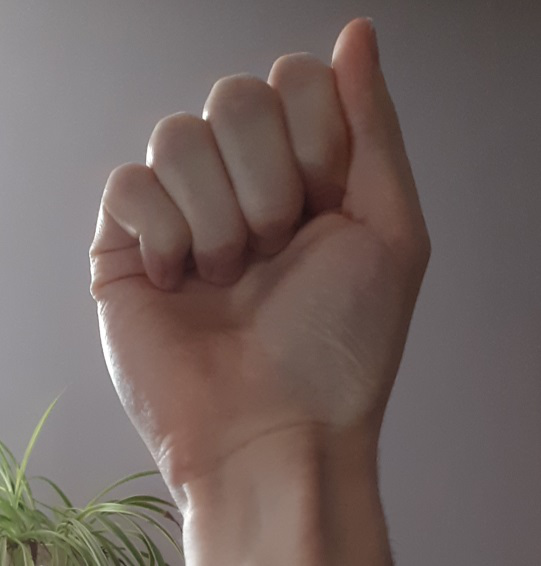

In [59]:
my_a = image.load_img('data/self_photos/a_crop_with_plant.jpg',
               grayscale=False,
               color_mode="rgb",
               target_size=None,
               interpolation="nearest")
my_a

In [60]:
my_a = image.load_img('data/self_photos/a_crop_with_plant.jpg',
               color_mode="grayscale",
               target_size=[28,28],
               interpolation="nearest")
my_a

In [67]:
my_o = image.load_img('data/self_photos/o_crop.jpg',
               color_mode="grayscale",
               target_size=[28,28],
               interpolation="nearest")
my_o

In [68]:
my_k = image.load_img('data/self_photos/k_crop.jpg',
               color_mode="grayscale",
               target_size=[28,28],
               interpolation="nearest")
my_k

Predictions for my signs: 'a' (0), 'o' (13), and 'k' (9)

In [90]:
input_arr = image.img_to_array(my_a)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = CNN_model_1.predict(input_arr)
print(f'Testing my a, correct answer 0, model predicts 0:')
predictions

Testing my a, correct answer 0, model predicts 0:


array([[9.9980074e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.9928021e-04, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [92]:
input_arr = image.img_to_array(my_o)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = CNN_model_1.predict(input_arr)
print(f'Testing my o, correct answer 13, model predicts 15:')
predictions

Testing my o, correct answer 13, model predicts 15:


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.6767954e-33]], dtype=float32)

In [94]:
input_arr = image.img_to_array(my_k)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = CNN_model_1.predict(input_arr)
print(f'Testing my k, correct answer 9, model predicts 10:')
predictions

Testing my k, correct answer 9, model predicts 10:


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

This is not A-OK.

## (pending)Using transfer learning from Keras applications

In order to improve recognition accuracy without sacrificing too much reaction time, I will use MobileNetV2. It is currently the smallest application [on Keras](https://keras.io/api/applications/). It is also a network architecture designed with hyperparameters that can trade-off between latency and accuracy, giving us case-specific optimization options.

Transfer learning involves importing new NN architecture that has been trained on a different dataset. Keras applications are usually trained with the imagenet dataset, which has over 14 million images and over 100 categories. This broad experience may improve recognition accuracy for the task at hand.

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

First, the model is imported and the final classification layers are removed.

In [8]:
experienced_model = MobileNetV2(weights='imagenet', include_top=False)

9412608/9406464 [==============================] - 1s 0us/step


In [9]:
# Assign the output of this base_model to a variable:
base_model_out = base_model.output



# Add a pooling layer:
base_model_out = GlobalAveragePooling2D()(base_model_out)

# Add 3 dense layers so that the model can learn aspects of our new dataset 
# and classify for better results.
base_model_out = Dense(243, activation='relu')(base_model_out) 
base_model_out = Dense(243, activation='relu')(base_model_out)
base_model_out = Dense(81, activation='relu')(base_model_out)

# Add a final layer with 3 neurons, one for each class in our dataset 
# using a softmabase_model_out activation function:
preds = Dense(3, activation='softmax')(base_model_out)




# Instantiate our final model, where we specify what are the inputs and 
# the outputs will look like
model = Model(inputs = base_model.input, 
              outputs = preds)

NameError: name 'base_model' is not defined